<a href="https://colab.research.google.com/github/samipn/clustering_demos/blob/main/gmm_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment (c): Gaussian Mixture Models (GMM) Clustering

This notebook applies Gaussian Mixture Models for clustering, uses AIC/BIC for model selection, and evaluates clustering quality with silhouette score.


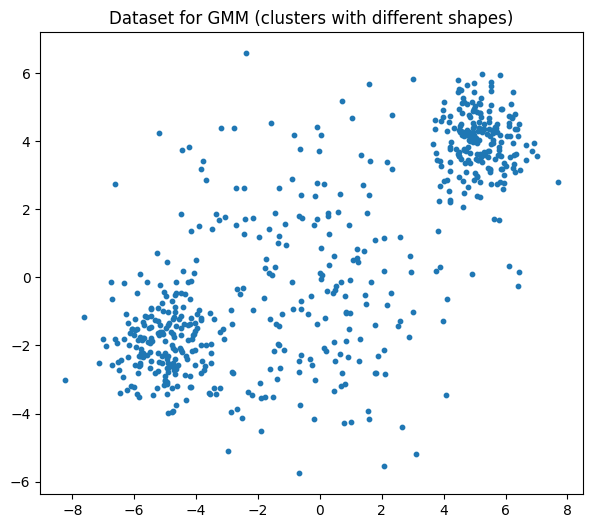

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

plt.rcParams["figure.figsize"] = (7, 6)
np.random.seed(42)

# Create dataset with clusters of different shapes / variances
X, y_true = make_blobs(
    n_samples=600,
    centers=[(-5, -2), (0, 0), (5, 4)],
    cluster_std=[1.0, 2.5, 0.8],
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Dataset for GMM (clusters with different shapes)")
plt.show()


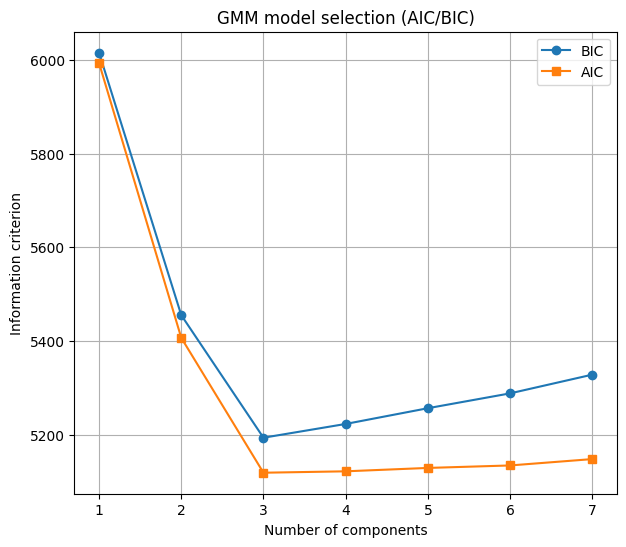

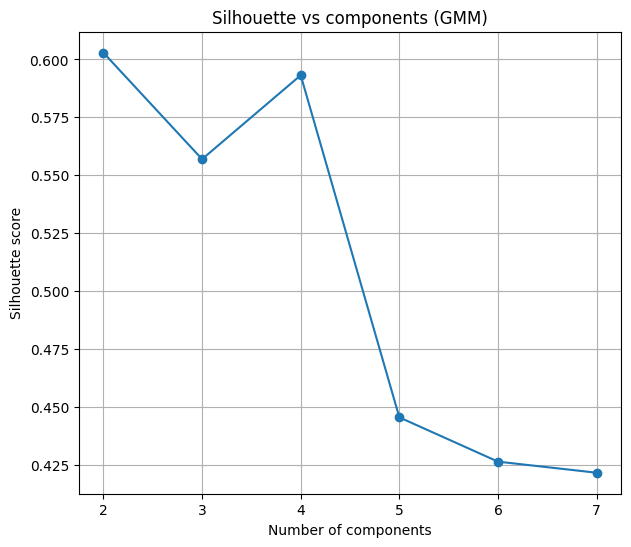

In [2]:
# Fit GMM with different numbers of components and compute AIC/BIC, silhouette
components_range = range(1, 8)
bic_values = []
aic_values = []
silhouettes = []

for n_components in components_range:
    gmm = GaussianMixture(
        n_components=n_components,
        covariance_type='full',
        random_state=42
    )
    gmm.fit(X)
    bic_values.append(gmm.bic(X))
    aic_values.append(gmm.aic(X))

    if n_components > 1:
        labels = gmm.predict(X)
        silhouettes.append(silhouette_score(X, labels))
    else:
        silhouettes.append(np.nan)

plt.figure()
plt.plot(components_range, bic_values, marker='o', label='BIC')
plt.plot(components_range, aic_values, marker='s', label='AIC')
plt.xlabel("Number of components")
plt.ylabel("Information criterion")
plt.title("GMM model selection (AIC/BIC)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(components_range, silhouettes, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs components (GMM)")
plt.grid(True)
plt.show()


Selected components: 3
Silhouette score: 0.5569638255077556


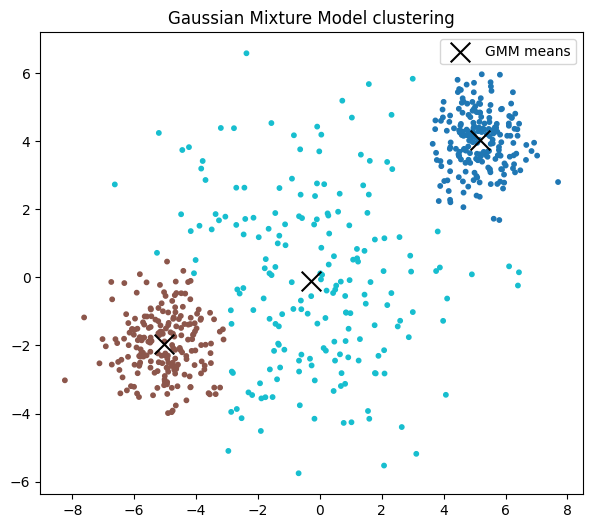

In [3]:
# Fit final GMM and visualize clusters
best_components = 3   # choose based on AIC/BIC
gmm = GaussianMixture(
    n_components=best_components,
    covariance_type='full',
    random_state=42
)
gmm.fit(X)
labels = gmm.predict(X)

print("Selected components:", best_components)
print("Silhouette score:", silhouette_score(X, labels))

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=10)
plt.scatter(
    gmm.means_[:, 0],
    gmm.means_[:, 1],
    c='black', marker='x', s=200, label='GMM means'
)
plt.title("Gaussian Mixture Model clustering")
plt.legend()
plt.show()
